In [1]:
import pandas as pd
import numpy as np

In [2]:
import os 


In [3]:
raw_data_list = []
for r,d,fs in os.walk('data/csmar_close'):
    for f in fs:
        
        if (not ('[DES]' in f)) and ('txt' in f):
            file_path = os.path.join(r,f)
            # print(file_path)
            raw_data_list.append(pd.read_csv(file_path,
                         sep='\t',
                         dtype={'Stkcd': str}))


In [4]:
working_data  =  pd.concat(raw_data_list,axis=0).set_index(['Trddt','Stkcd'])

In [5]:
working_data

,,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,...,Markettype,Capchgdt,Trdsta,Ahshrtrd_D,Ahvaltrd_D,PreClosePrice,ChangeRatio,LimitDown,LimitUp,LimitStatus
Trddt,Stkcd,,,,,,,,,,,,,,,,,,,,,
2020-09-16,000001,15.32,15.54,15.21,15.44,72241475,1.114668e+09,2.996248e+08,2.996274e+08,0.005863,0.005863,...,4,2019-12-31,1,0,0.0,15.35,0.005863,13.82,16.89,0.0
2020-09-17,000001,15.54,15.72,15.40,15.57,98821563,1.543415e+09,3.021476e+08,3.021501e+08,0.008420,0.008420,...,4,2019-12-31,1,0,0.0,15.44,0.008420,13.90,16.98,0.0
2020-09-18,000001,15.62,16.09,15.52,16.07,137319330,2.186759e+09,3.118504e+08,3.118531e+08,0.032113,0.032113,...,4,2019-12-31,1,0,0.0,15.57,0.032113,14.01,17.13,0.0
2020-09-21,000001,16.00,16.05,15.71,15.86,89616165,1.418371e+09,3.077752e+08,3.077779e+08,-0.013068,-0.013068,...,4,2019-12-31,1,0,0.0,16.07,-0.013068,14.46,17.68,0.0
2020-09-22,000001,15.67,15.84,15.39,15.57,86775631,1.354536e+09,3.021476e+08,3.021501e+08,-0.018285,-0.018285,...,4,2019-12-31,1,0,0.0,15.86,-0.018285,14.27,17.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08,300136,17.21,17.32,17.06,17.13,6801504,1.167380e+08,1.410766e+07,1.657445e+07,-0.005226,-0.005226,...,16,2022-06-30,1,0,0.0,17.22,-0.005226,13.78,20.66,0.0
2022-12-09,300136,17.20,17.24,16.93,17.03,9055406,1.544419e+08,1.402530e+07,1.647769e+07,-0.005838,-0.005838,...,16,2022-06-30,1,0,0.0,17.13,-0.005838,13.70,20.56,0.0
2022-12-12,300136,17.04,17.48,16.93,17.30,12129766,2.095601e+08,1.424766e+07,1.673894e+07,0.015854,0.015854,...,16,2022-06-30,1,2800,48440.0,17.03,0.015854,13.62,20.44,0.0


In [6]:
adj_price_df = working_data[['Adjprcwd']].unstack('Stkcd')
adj_price_df.columns = adj_price_df.columns.get_level_values(1)
log_return_df = np.log(adj_price_df.shift(-1)/adj_price_df)

In [7]:
import pandas as pd

def create_monthly_cv(data, step=1, train_size=1, test_size=1):
    """
    基于月份向前推进，创建时间序列数据的训练集和测试集，
    并允许分别指定训练集和测试集的大小，以及-1选项来使用所有可用数据。

    参数:
    data (pd.DataFrame): 带有时间索引的 DataFrame。
    step (int): 每次向前推进的月份数。默认为1个月。
    train_size (int): 每个训练集包含的月份数。
                      如果为 -1，则训练集包含从数据开始到当前测试集开始之前的所有数据。
                      默认为1个月。
    test_size (int): 每个测试集包含的月份数。默认为1个月。

    返回:
    tuple: 包含训练集列表和测试集列表的元组。
    """
    train_list = []
    test_list = []

    # 获取数据的时间范围
    min_date = data.index.min()
    max_date = data.index.max()

    # 确定迭代的起始点
    # 我们需要找到第一个可能的测试集结束日期，这样训练集才不会为空
    # 如果test_size >= 1，那么训练集至少需要是test_size月份的数据
    # 如果train_size = -1，则训练集可以是任意大小，但测试集是关键
    
    # 找到第一个测试集的结束日期
    current_test_end_month = min_date + pd.DateOffset(months=test_size) - pd.Timedelta(days=1)
    
    # 如果第一个测试集结束日期就超过了最大日期，则无法生成任何数据对
    if current_test_end_month > max_date and test_size > 0:
        print("Warning: The specified test_size is too large for the provided data. No data pairs can be generated.")
        return [], []

    # 确立第一个测试集的开始日期
    current_test_start_month = min_date
    
    # 循环生成训练集和测试集对
    while current_test_start_month <= max_date:
        # 计算当前测试集的结束日期
        # 确保不超过数据的最大日期
        current_test_end_month = current_test_start_month + pd.DateOffset(months=test_size) - pd.Timedelta(days=1)
        if current_test_end_month > max_date:
            current_test_end_month = max_date

        # 确定训练集的结束日期
        # 训练集结束于当前测试集开始之前
        train_end_date = current_test_start_month - pd.Timedelta(days=1)

        # 确定训练集的开始日期
        if train_size == -1:
            # 如果 train_size 为 -1，训练集从数据的最小日期开始
            train_start_date = min_date
        else:
            # 否则，训练集从当前测试集开始日期向前推 train_size 个月
            train_start_date = current_test_start_month - pd.DateOffset(months=train_size)

        # 提取训练集数据
        # 确保训练集的开始日期不早于数据的最小日期
        if train_start_date < min_date:
            train_start_date = min_date
            
        # 确保训练集和测试集有重叠（即训练集不为空且测试集不为空）
        # 并且训练集的结束日期必须早于测试集的开始日期
        if train_end_date >= train_start_date and current_test_start_month <= current_test_end_month:
            train_data = data[(data.index >= train_start_date) & (data.index <= train_end_date)]
            test_data = data[(data.index >= current_test_start_month) & (data.index <= current_test_end_month)]

            # 只有当训练集和测试集都非空时，才添加到列表中
            if not train_data.empty and not test_data.empty:
                train_list.append(train_data)
                test_list.append(test_data)
        
        # 推进到下一个测试集的开始日期
        # 确保 step > 0 以避免死循环
        if step <= 0:
            print("Error: step must be a positive integer to avoid infinite loop.")
            break
        
        # 记录推进前的日期，用于检测是否发生变化
        prev_test_start_month = current_test_start_month
        current_test_start_month = current_test_start_month + pd.DateOffset(months=step)
        
        # 如果推进后的日期没有改变（例如，月数不足以进位，或者step=0），则强制推进一天以避免死循环
        if current_test_start_month <= prev_test_start_month:
            current_test_start_month += pd.Timedelta(days=1)
            
        # 如果推进后的测试集开始日期已经超过了数据的最大日期，则结束循环
        if current_test_start_month > max_date:
            break

    return train_list, test_list

In [8]:
log_return_df.std().nlargest(20)

Stkcd
301551    0.117464
300362    0.111201
300431    0.101208
920100    0.085951
600701    0.080831
301632    0.080292
603400    0.078748
688615    0.078213
600891    0.078153
002711    0.070000
837748    0.068652
833030    0.067232
301618    0.067011
837592    0.066559
002359    0.066191
301678    0.065936
920002    0.065159
001221    0.064014
873693    0.063536
831627    0.063231
dtype: float64

In [9]:
adj_price_df.index = pd.to_datetime(adj_price_df.index)

In [10]:
from scipy.optimize import minimize

def min_variance_portfolio_no_short(cov_matrix):
    n = cov_matrix.shape[0]
    
    # 目标函数：组合方差
    def objective(w):
        return w @ cov_matrix @ w
    
    # 约束条件：权重之和为1
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    
    # 边界条件：权重非负
    bounds = [(0, 1) for _ in range(n)]
    
    # 初始猜测（等权重）
    w0 = np.ones(n) / n
    
    # 优化
    result = minimize(objective, w0, method='SLSQP', 
                      bounds=bounds, 
                      constraints=constraints,
                      options={'maxiter': 100, 'ftol': 1e-10}
                     )
    
    return result.x

In [11]:
def train_eval_cv(train_list,test_list,stock_num = 30):
    ret_list = []
    for train,test in zip(train_list,test_list):
        log_ret_train = np.log(train.shift(-1)/train).iloc[:-1]
        log_ret_train  = log_ret_train.T.dropna().T
        
        select = log_ret_train.std().nsmallest(stock_num)
        # selcet = log_ret_train.samlpe(30)
        select_stock = select.index.tolist()
        test.ffill(inplace=True)
        
        select_rets = np.log(test[select_stock].iloc[-1]/test[select_stock].iloc[0])
        is_select_rets = np.log(train[select_stock].iloc[-1]/train[select_stock].iloc[0])
        ret = np.nansum(select_rets)/stock_num
        is_ret =  np.nansum(is_select_rets)/stock_num
    
        # display(log_ret_train[select_stock].tail())
        
        cov_ret = log_ret_train[select_stock].cov()
        # print(log_ret_train.shape)
        mak_weight = min_variance_portfolio_no_short(cov_ret)
        mak_ret = np.sum(mak_weight*select_rets)
        is_mak_ret = np.sum(mak_weight*is_select_rets)
    
        ret_list.append({
            'simple_train':is_ret,
            'mak_train':is_mak_ret,
            'simple_test':ret,
            'mak_test':mak_ret,
        }
        )
    
    return ret_list

In [12]:
working_data.memory_usage().sum()/1024/1024

np.float64(1050.5696830749512)

In [38]:
train_list , test_list = create_monthly_cv(adj_price_df,step=2,train_size=12,test_size=2)
result = train_eval_cv(train_list , test_list) 

/var/folders/qb/_zmdxt6n29n5h6hxbt7v0v0c0000gn/T/ipykernel_92101/2546015914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.ffill(inplace=True)
/var/folders/qb/_zmdxt6n29n5h6hxbt7v0v0c0000gn/T/ipykernel_92101/2546015914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.ffill(inplace=True)
/var/folders/qb/_zmdxt6n29n5h6hxbt7v0v0c0000gn/T/ipykernel_92101/2546015914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te

In [39]:
result = pd.DataFrame(result)
result.mean()/result.std()

simple_train   -0.019734
mak_train       0.327611
simple_test     0.241834
mak_test        0.325535
dtype: float64

<Axes: >

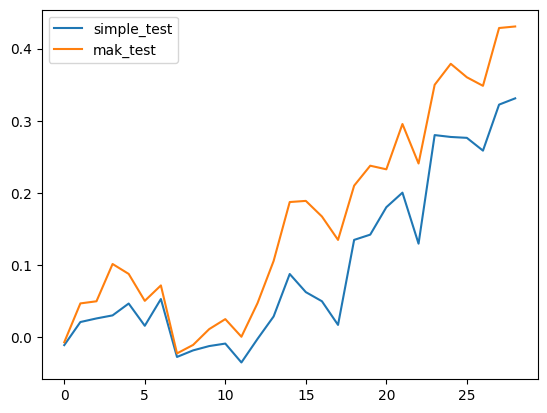

In [40]:
result[['simple_test','mak_test']].cumsum().plot()

<Axes: >

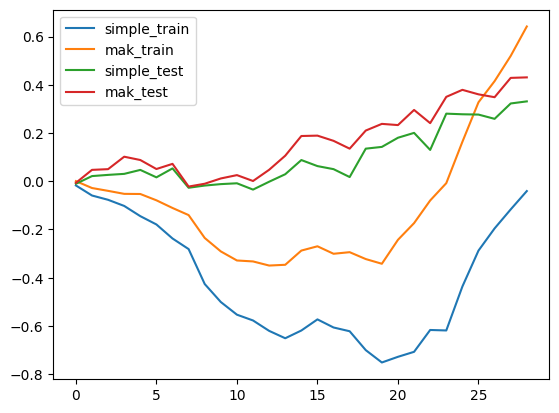

In [41]:
result.cumsum().plot()

In [34]:
#接下来对窗口，开始时间，还有因子数做超参优化